# Rainfall Prediciton

Heavy rainfall prediction is a major problem for meteorological department as it is closely associated with the economy and life of human. It is a cause for natural disasters like flood and drought which are encountered by people across the globe every year. Accuracy of rainfall forecasting has great importance for countries like India whose economy is largely dependent on agriculture. Due to dynamic nature of atmosphere, Statistical techniques fail to provide good accuracy for rainfall forecasting. Nonlinearity of rainfall data makes Machine learning a better technique. Review work and comparison of different approaches and algorithms used by researchers for rainfall prediction is shown. Intention of this project is to give non-experts easy access to the techniques and approaches used in the field of rainfall prediction.

In [65]:
# Import the libraries

import pandas as pd
import numpy as np
import math
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [66]:
# Import the Data
data = pd.read_csv(r'F:\JUPTER NOTEBOOK\RAVI SHANKAR PROJECTS\RAINFALL PREDICTION MODEL\rainfall.csv')

In [67]:
# Read Data
data.head(5)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [129]:
rows = data.shape[0]
column = data.shape[1]

print('rows:',rows)
print('columns:', column)

rows: 115
columns: 13


In [130]:
# Check the datatypes of all the columns in the data

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 3427 to 3541
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    115 non-null    int64  
 1   JAN     115 non-null    float64
 2   FEB     115 non-null    float64
 3   MAR     115 non-null    float64
 4   APR     115 non-null    float64
 5   MAY     115 non-null    float64
 6   JUN     115 non-null    float64
 7   JUL     115 non-null    float64
 8   AUG     115 non-null    float64
 9   SEP     115 non-null    float64
 10  OCT     115 non-null    float64
 11  NOV     115 non-null    float64
 12  DEC     115 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 12.6 KB


In [131]:
# Check for missing valued in Data

data.isnull().sum()

YEAR    0
JAN     0
FEB     0
MAR     0
APR     0
MAY     0
JUN     0
JUL     0
AUG     0
SEP     0
OCT     0
NOV     0
DEC     0
dtype: int64

In [71]:
data.duplicated().sum()

0

In [72]:
data.SUBDIVISION.value_counts()

WEST MADHYA PRADESH                   115
EAST RAJASTHAN                        115
COASTAL KARNATAKA                     115
TAMIL NADU                            115
RAYALSEEMA                            115
TELANGANA                             115
COASTAL ANDHRA PRADESH                115
CHHATTISGARH                          115
VIDARBHA                              115
MATATHWADA                            115
MADHYA MAHARASHTRA                    115
KONKAN & GOA                          115
SAURASHTRA & KUTCH                    115
GUJARAT REGION                        115
EAST MADHYA PRADESH                   115
KERALA                                115
WEST RAJASTHAN                        115
SOUTH INTERIOR KARNATAKA              115
JAMMU & KASHMIR                       115
HIMACHAL PRADESH                      115
PUNJAB                                115
HARYANA DELHI & CHANDIGARH            115
UTTARAKHAND                           115
WEST UTTAR PRADESH                

In [73]:
import warnings
warnings.filterwarnings('ignore')

In [74]:
data.mean()

YEAR       1958.218659
JAN          18.957320
FEB          21.805325
MAR          27.359197
APR          43.127432
MAY          85.745417
JUN         230.234444
JUL         347.214334
AUG         290.263497
SEP         197.361922
OCT          95.507009
NOV          39.866163
DEC          18.870580
ANNUAL     1411.008900
Jan-Feb      40.747786
Mar-May     155.901753
Jun-Sep    1064.724769
Oct-Dec     154.100487
dtype: float64

In [75]:
data.isnull().any()

SUBDIVISION    False
YEAR           False
JAN             True
FEB             True
MAR             True
APR             True
MAY             True
JUN             True
JUL             True
AUG             True
SEP             True
OCT             True
NOV             True
DEC             True
ANNUAL          True
Jan-Feb         True
Mar-May         True
Jun-Sep         True
Oct-Dec         True
dtype: bool

In [76]:
data.YEAR.unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1946, 1947, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       1943, 1944, 1945, 1948, 1909], dtype=int64)

In [77]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SUBDIVISION,4116,36,WEST MADHYA PRADESH,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEAR,4116.0,NaN,NaN,NaN,1958.218659,33.140898,1901.0,1930.0,1958.0,1987.0,2015.0
JAN,4112.0,NaN,NaN,NaN,18.95732,33.585371,0.0,0.6,6.0,22.2,583.7
FEB,4113.0,NaN,NaN,NaN,21.805325,35.909488,0.0,0.6,6.7,26.8,403.5
MAR,4110.0,NaN,NaN,NaN,27.359197,46.959424,0.0,1.0,7.8,31.3,605.6
APR,4112.0,NaN,NaN,NaN,43.127432,67.831168,0.0,3.0,15.7,49.95,595.1
MAY,4113.0,NaN,NaN,NaN,85.745417,123.234904,0.0,8.6,36.6,97.2,1168.6
JUN,4111.0,NaN,NaN,NaN,230.234444,234.710758,0.4,70.35,138.7,305.15,1609.9
JUL,4109.0,NaN,NaN,NaN,347.214334,269.539667,0.0,175.6,284.8,418.4,2362.8
AUG,4112.0,NaN,NaN,NaN,290.263497,188.770477,0.0,155.975,259.4,377.8,1664.6


## Data Visualization

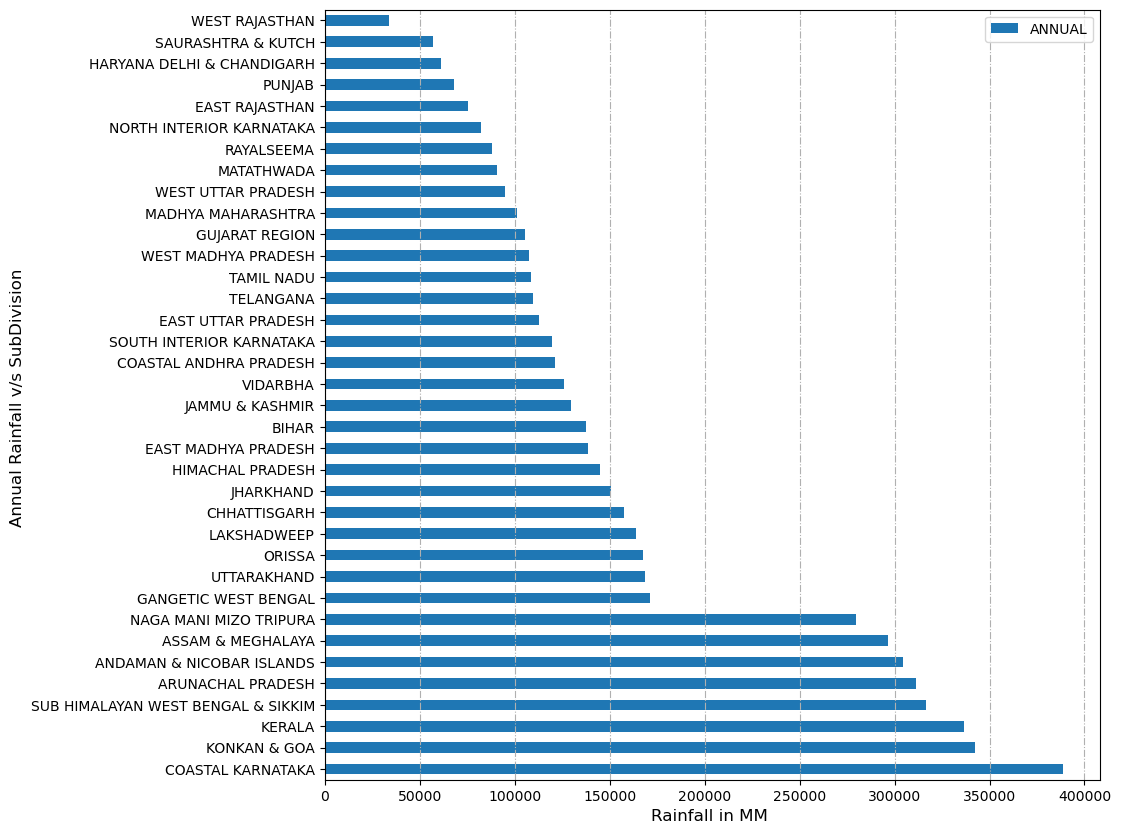

In [78]:
data[['SUBDIVISION','ANNUAL']].groupby('SUBDIVISION').sum().sort_values(by = 'ANNUAL', ascending= False).plot\
(kind ='barh',  figsize = (10,10))
plt.xlabel('Rainfall in MM ', size = 12)
plt.ylabel('Annual Rainfall v/s SubDivision ', size = 12)
plt.grid(axis = 'x', linestyle = '-.')
plt.show()

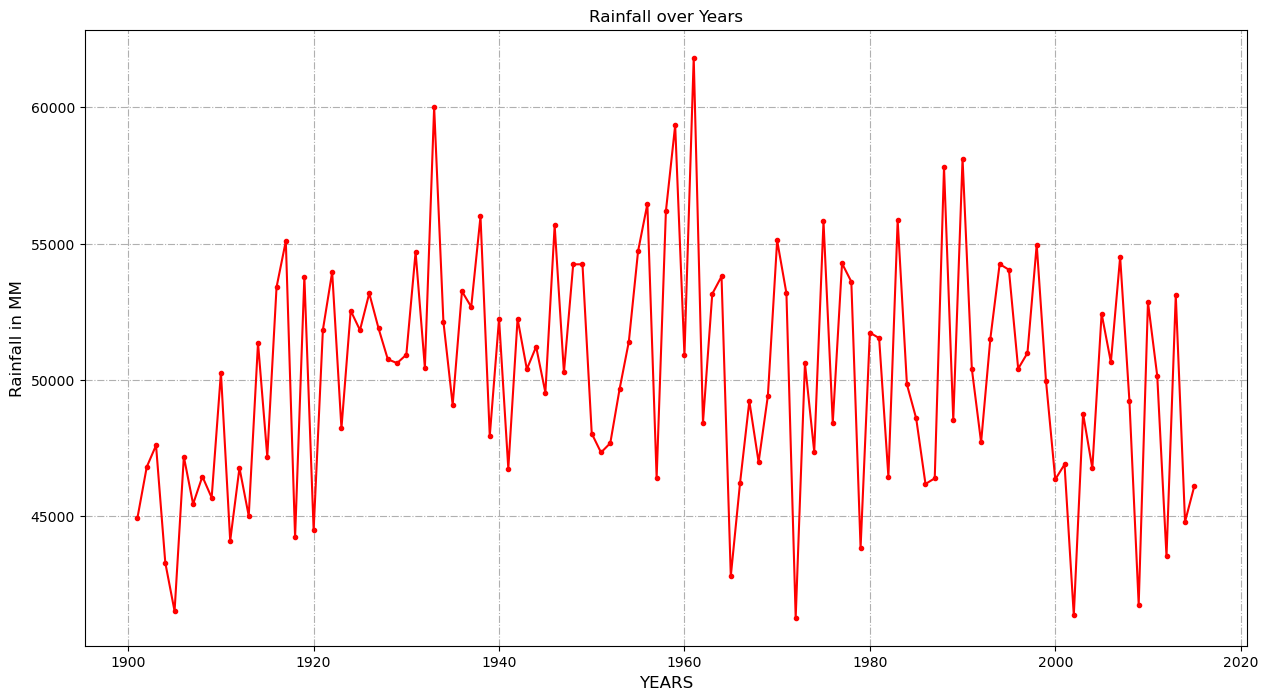

In [79]:
plt.figure(figsize=(15,8))
data.groupby('YEAR')['ANNUAL'].sum().plot(kind ='line', color = 'r', marker = '.')
plt.xlabel('YEARS', size = 12)
plt.ylabel('Rainfall in MM', size = 12)
plt.grid(axis = 'both', linestyle = '-.')
plt.title('Rainfall over Years')
plt.show()

In [80]:
data.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec'],
      dtype='object')

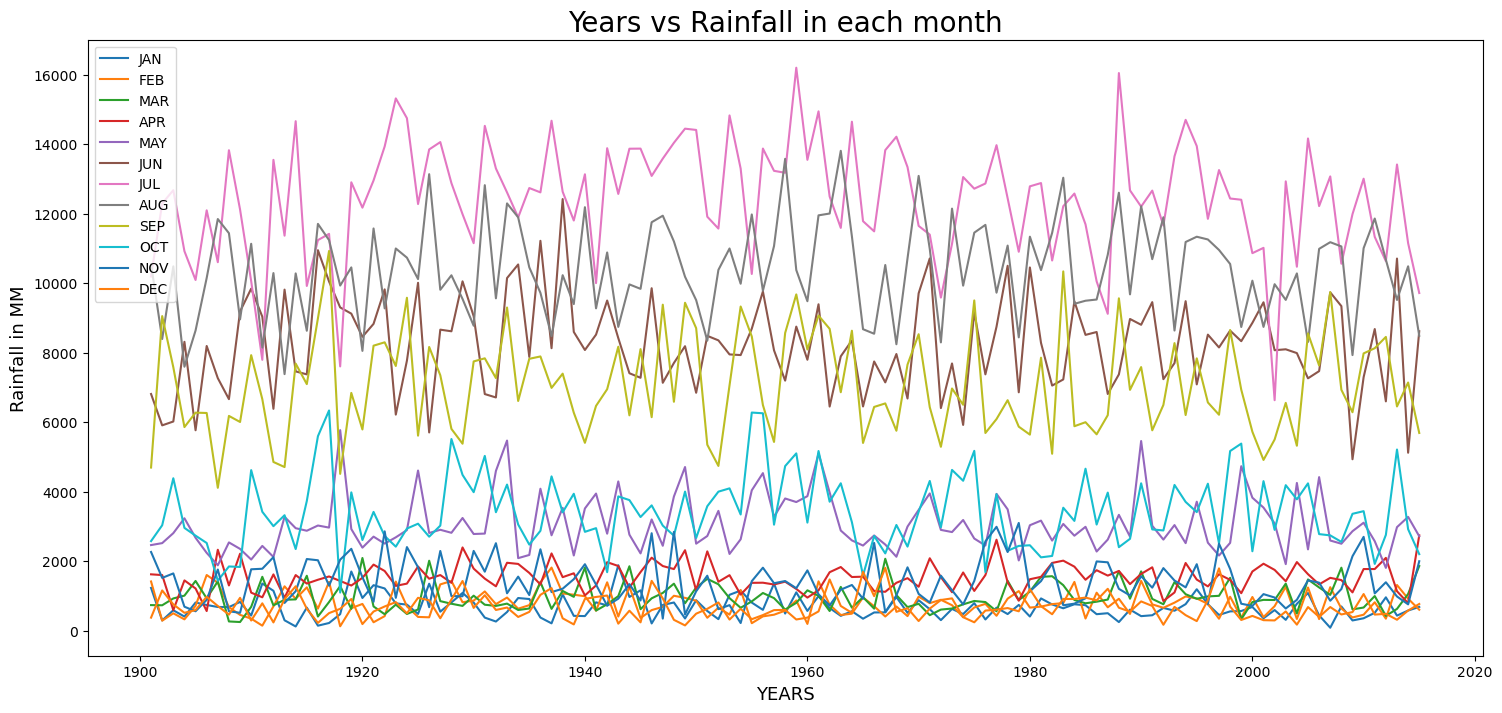

In [81]:
data[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby('YEAR').sum().plot(kind = 'line', figsize=(18,8))
plt.xlabel('YEARS', size = 13)
plt.ylabel('Rainfall in MM', size = 13)
plt.title('Years vs Rainfall in each month', size =20)
plt.show()

# This Data shows that july month has heaviest rainfall and Feb has least

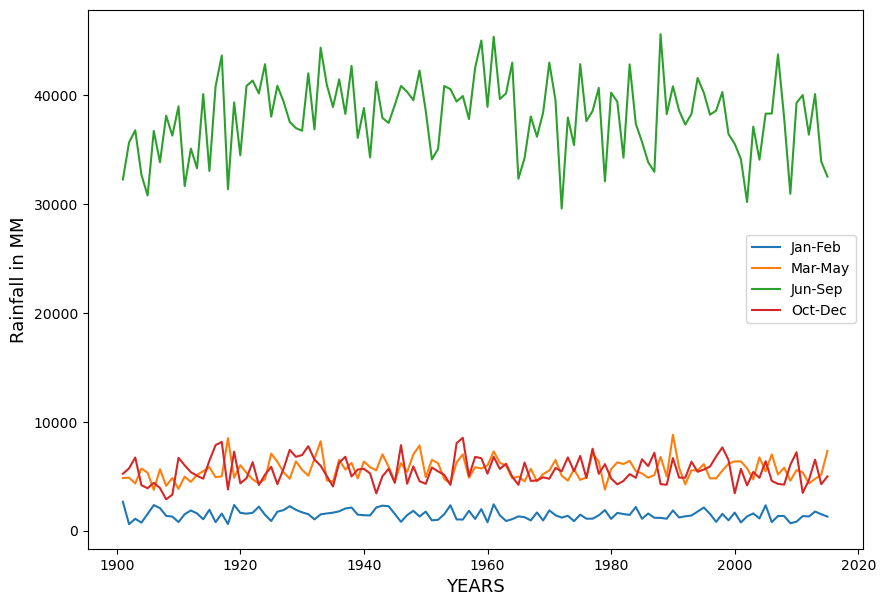

In [82]:
data[['YEAR', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby('YEAR').sum().plot(figsize=(10,7))
plt.xlabel('YEARS', size = 13)
plt.ylabel('Rainfall in MM', size = 13)
plt.show()
#  this data shows us that Jun to Sept has highest rainfall, Month of Jan anf Feb combined received least rainfall

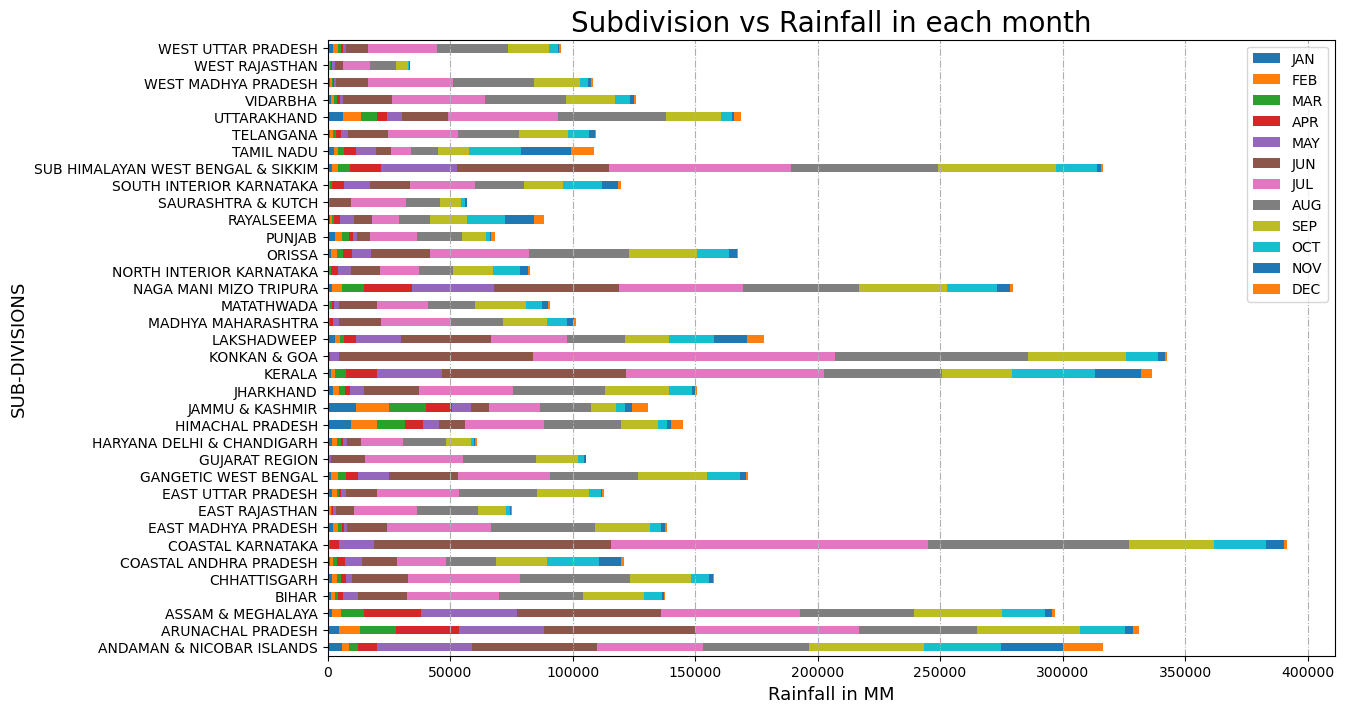

In [83]:
data[['SUBDIVISION', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby('SUBDIVISION').sum().plot(kind = 'barh',stacked = True, figsize=(13,8))
plt.ylabel('SUB-DIVISIONS', size = 13)
plt.xlabel('Rainfall in MM', size = 13)
plt.title('Subdivision vs Rainfall in each month', size =20)
plt.grid(axis = 'x', linestyle = '-.')
plt.show()

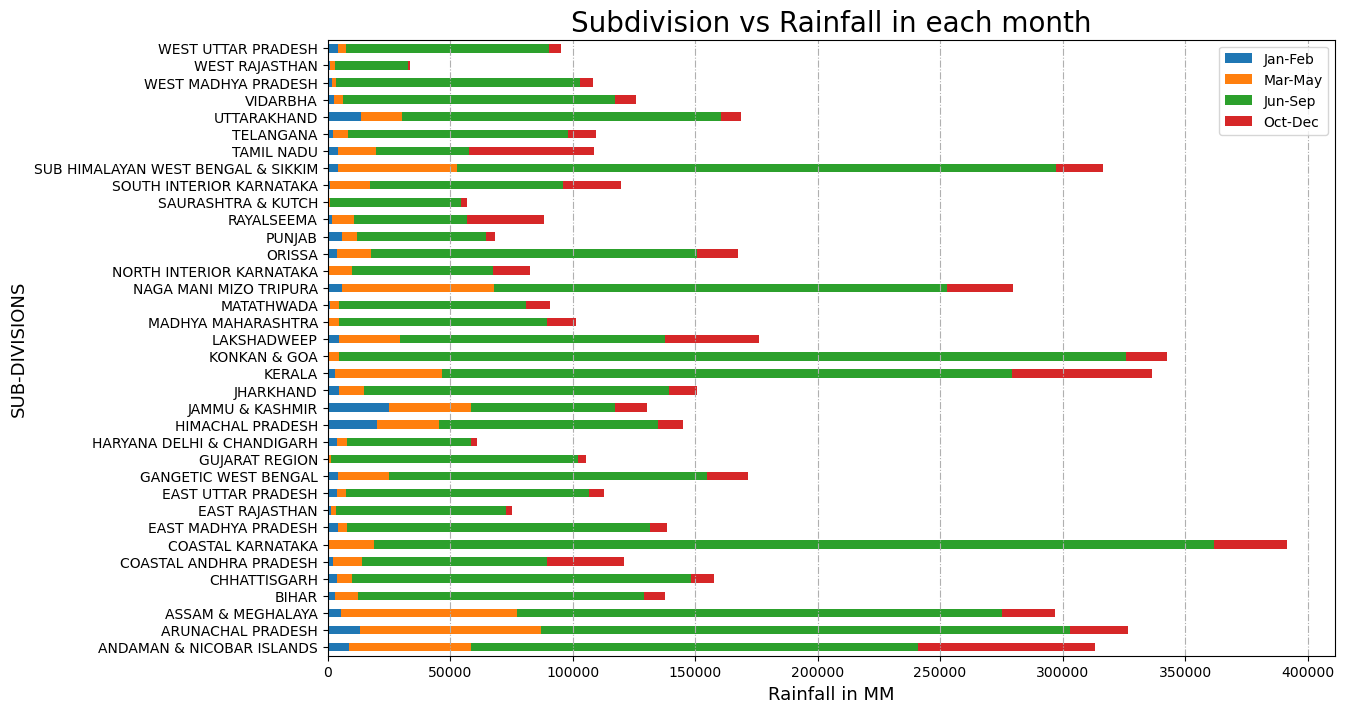

In [84]:
data[['SUBDIVISION','Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby('SUBDIVISION').sum().plot(kind = 'barh',stacked = True, figsize=(13,8))
plt.ylabel('SUB-DIVISIONS', size = 13)
plt.xlabel('Rainfall in MM', size = 13)
plt.title('Subdivision vs Rainfall in each month', size =20)
plt.grid(axis = 'x', linestyle = '-.')
plt.show()


# Eastern states have good amount of rainfall in Jun to Sep

In [85]:
# Analysis of rainfall data Tamil Nadu

TN = data.loc[((data.SUBDIVISION == 'TAMIL NADU'))]
TN.head(4)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
3427,TAMIL NADU,1901,24.5,39.1,21.7,36.0,74.0,41.8,49.3,67.9,191.1,122.3,212.3,80.4,960.3,63.6,131.6,350.1,415.0
3428,TAMIL NADU,1902,67.2,9.8,25.1,21.9,84.7,39.3,55.1,113.8,98.6,282.2,174.9,165.8,1138.2,77.0,131.7,306.7,622.9
3429,TAMIL NADU,1903,19.3,7.8,1.7,18.2,128.5,58.5,72.6,115.0,210.4,128.1,200.5,203.2,1163.9,27.1,148.4,456.5,531.9
3430,TAMIL NADU,1904,35.2,0.1,0.7,19.5,121.9,34.9,89.0,40.4,85.7,163.2,23.6,49.1,663.1,35.3,142.1,249.9,235.8


In [86]:
# TamilNadu has good amount of rainfall in Oct and Nov

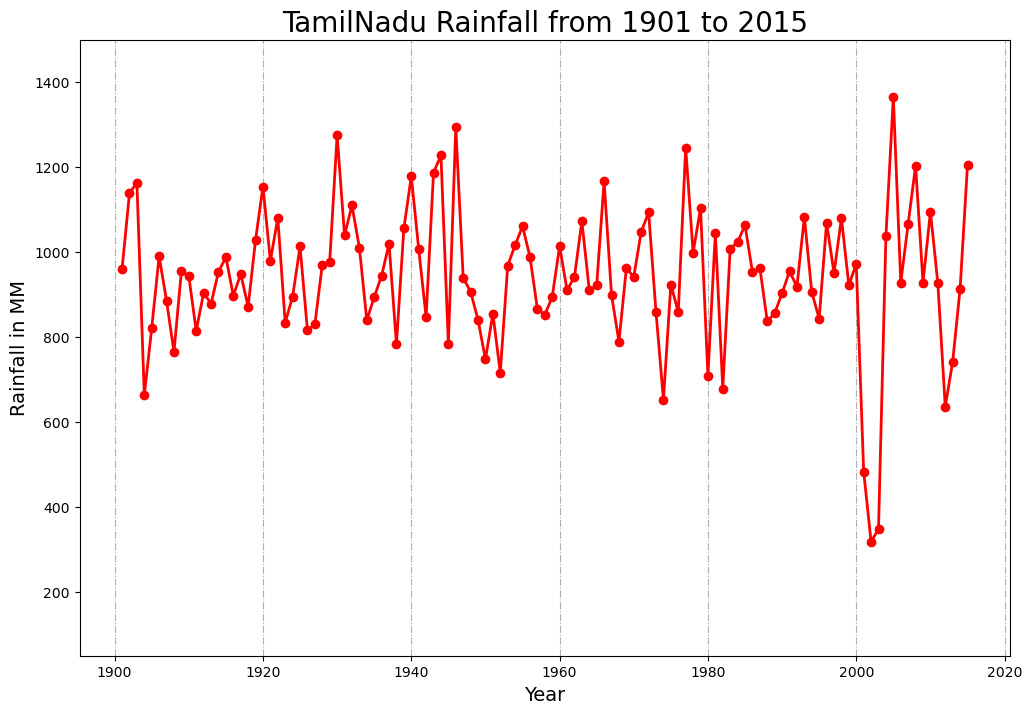

In [87]:
TN.groupby('YEAR')['ANNUAL'].sum().plot(ylim=(50,1500), color = 'r', marker ='o', linestyle = '-', linewidth =2,\
                                        figsize = (12,8))
plt.ylabel('Rainfall in MM', size = 14)
plt.xlabel('Year', size = 14)
plt.title('TamilNadu Rainfall from 1901 to 2015', size =20)
plt.grid(axis = 'x', linestyle = '-.')
plt.show()

# The lowest rainfall received in TamilNadu was in 2002, 2003 and highest was noted in 2005

In [88]:
Rajasthan =  data.loc[((data['SUBDIVISION'] == 'WEST RAJASTHAN') | (data['SUBDIVISION'] == 'EAST RAJASTHAN'))]
Rajasthan.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
1817,WEST RAJASTHAN,1901,6.7,0.0,1.1,0.0,6.1,3.0,79.0,59.2,1.0,2.1,0.0,0.6,158.9,6.7,7.2,142.2,2.7
1818,WEST RAJASTHAN,1902,0.0,0.0,0.0,0.5,4.0,49.1,27.0,71.3,41.8,1.8,0.0,0.0,195.6,0.0,4.5,189.2,1.8
1819,WEST RAJASTHAN,1903,1.7,1.3,5.5,0.0,4.2,2.7,154.8,87.1,49.3,0.1,0.0,0.5,307.0,3.0,9.7,293.8,0.5
1820,WEST RAJASTHAN,1904,3.8,2.9,16.3,0.7,11.4,14.6,39.8,45.6,21.4,1.4,2.9,7.1,167.9,6.6,28.5,121.4,11.4
1821,WEST RAJASTHAN,1905,6.3,4.8,0.7,1.3,0.3,4.9,30.1,0.6,64.5,0.0,0.0,0.9,114.4,11.0,2.4,100.1,0.9


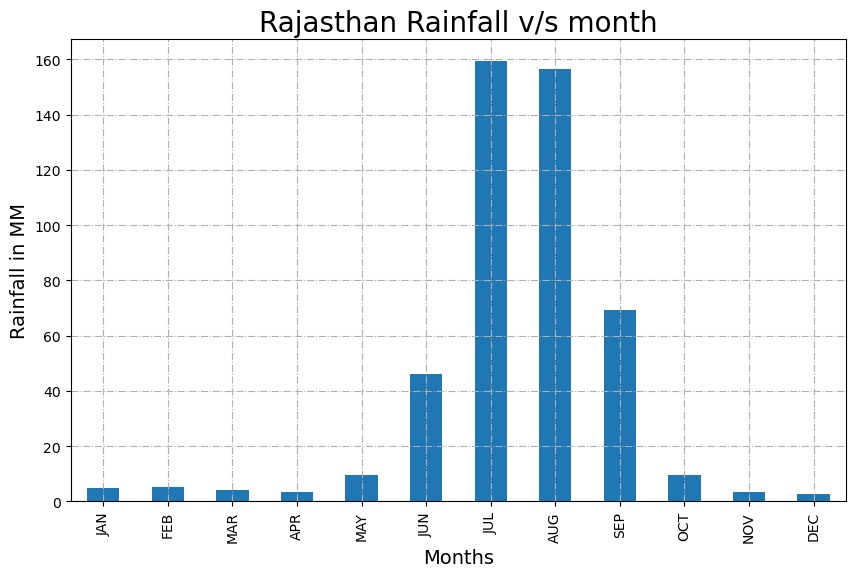

In [89]:
plt.figure(figsize=(10,6))
Rajasthan[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].mean().plot(kind = 'bar', width = 0.5, linewidth =2)
plt.ylabel('Rainfall in MM', size = 14)
plt.xlabel('Months', size = 14)
plt.title('Rajasthan Rainfall v/s month', size =20)
plt.grid(axis = 'both', linestyle = '-.')
plt.show()

# Rajsthan received highest rainfall in Jul & Aug 

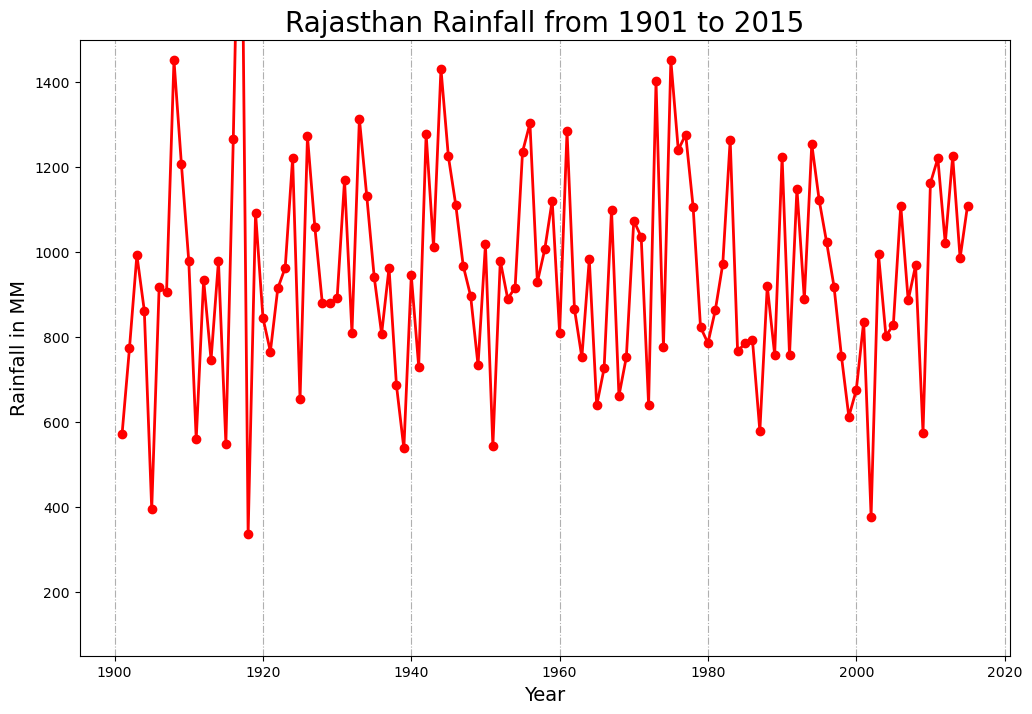

In [90]:
Rajasthan.groupby('YEAR').sum()['ANNUAL'].plot(ylim=(50,1500), color = 'r', marker ='o', linestyle = '-', linewidth =2,\
                                        figsize = (12,8))
plt.ylabel('Rainfall in MM', size = 14)
plt.xlabel('Year', size = 14)
plt.title('Rajasthan Rainfall from 1901 to 2015', size =20)
plt.grid(axis = 'x', linestyle = '-.')
plt.show()

# the large amount of rain in Rajasthan was observed in 1918

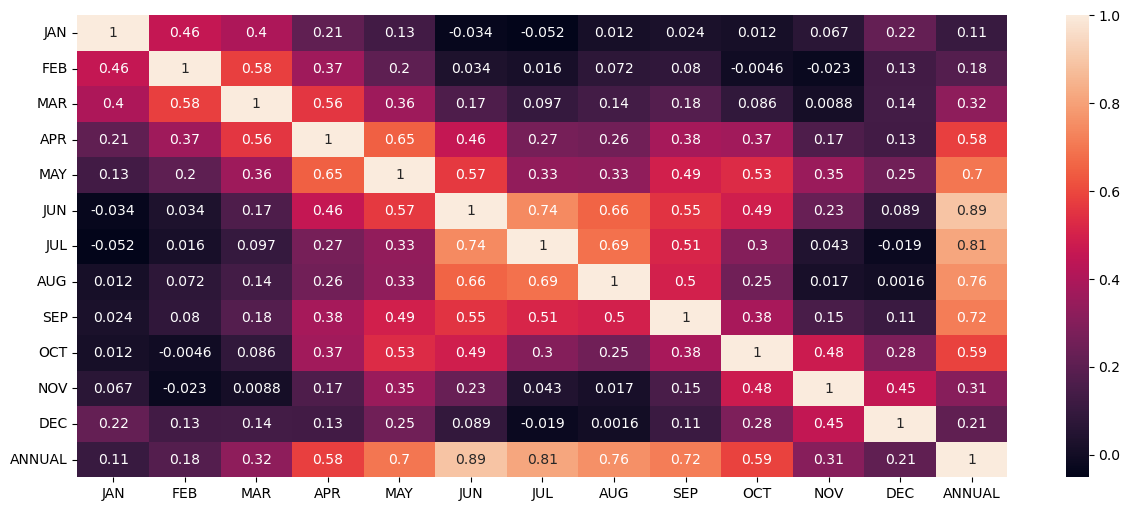

In [91]:
plt.figure(figsize=(15,6))
sns.heatmap(data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC','ANNUAL']].corr(), annot =True)
plt.show()

## Modelling

In [92]:
data['SUBDIVISION'].nunique()

36

In [93]:
group = data.groupby('SUBDIVISION')['YEAR','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
data = group.get_group(('TAMIL NADU'))
data.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
3427,1901,24.5,39.1,21.7,36.0,74.0,41.8,49.3,67.9,191.1,122.3,212.3,80.4
3428,1902,67.2,9.8,25.1,21.9,84.7,39.3,55.1,113.8,98.6,282.2,174.9,165.8
3429,1903,19.3,7.8,1.7,18.2,128.5,58.5,72.6,115.0,210.4,128.1,200.5,203.2
3430,1904,35.2,0.1,0.7,19.5,121.9,34.9,89.0,40.4,85.7,163.2,23.6,49.1
3431,1905,6.5,7.5,17.2,64.8,83.7,49.8,39.0,101.8,73.5,250.4,123.7,3.2


In [94]:
df = data.melt(['YEAR']).reset_index()
df.head()

,index,YEAR,variable,value
0,0,1901,JAN,24.5
1,1,1902,JAN,67.2
2,2,1903,JAN,19.3
3,3,1904,JAN,35.2
4,4,1905,JAN,6.5


In [95]:
df = df[['YEAR', 'variable', 'value']].reset_index().sort_values(by = ['YEAR', 'index'])
df.head()

,index,YEAR,variable,value
0,0,1901,JAN,24.5
115,115,1901,FEB,39.1
230,230,1901,MAR,21.7
345,345,1901,APR,36.0
460,460,1901,MAY,74.0


In [96]:
df.YEAR.unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

In [97]:
df.columns = ['Index', 'Year', 'Month', 'Avg_Rainfall']

In [98]:
df.head()

,Index,Year,Month,Avg_Rainfall
0,0,1901,JAN,24.5
115,115,1901,FEB,39.1
230,230,1901,MAR,21.7
345,345,1901,APR,36.0
460,460,1901,MAY,74.0


In [99]:
Month_map = {'JAN':1, 'FEB':2, 'MAR':3, 'APR':4, 'MAY':5, 'JUN':6, 'JUL':7, 'AUG':8, 'SEP':9, 'OCT':10, 'NOV':11, 'DEC':12}
df['Month'] = df['Month'].map(Month_map)

In [100]:
df.drop(columns = 'Index', inplace = True)

In [101]:
df.head()

,Year,Month,Avg_Rainfall
0,1901,1,24.5
115,1901,2,39.1
230,1901,3,21.7
345,1901,4,36.0
460,1901,5,74.0


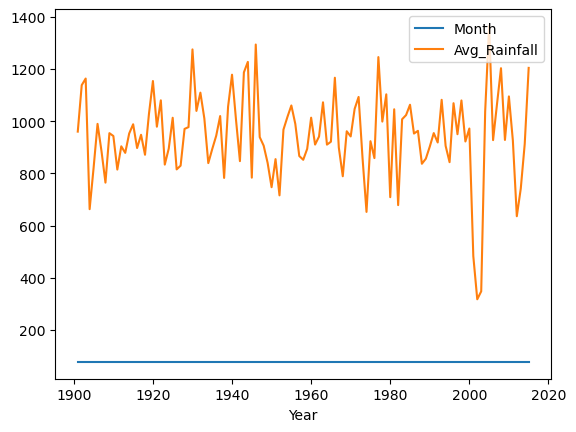

In [102]:
df.groupby('Year').sum().plot()
plt.show()

In [103]:
X = np.asanyarray(df[['Year', 'Month']]).astype('int')
Y = np.asanyarray(df[['Avg_Rainfall']]).astype('int')

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y ,test_size= 0.3, random_state=10)

## Linear Regression Model

In [105]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [106]:
lr.fit(X_train , Y_train)

LinearRegression()

In [107]:
y_train_predict = lr.predict(X_train)
y_test_predict = lr.predict(X_test)

In [108]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error
print('-------Test Data-------')
print('MAE', mean_absolute_error(Y_test, y_test_predict))
print('MSE', mean_squared_error(Y_test, y_test_predict))
print('RMSE', np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print('-------Train Data-------')
print('MAE', mean_absolute_error(Y_train, y_train_predict))
print('MSE', mean_squared_error(Y_train, y_train_predict))
print('RMSE', np.sqrt(mean_squared_error(Y_train, y_train_predict)))

print('-------Training Accuracy-------')
print(round(lr.score(X_train, Y_train),3)* 100)
print('-------Test Accuracy-------')
print(round(lr.score(X_test, Y_test),3)* 100)

-------Test Data-------
MAE 36.693305772295616
MSE 2707.3775495923837
RMSE 52.032466303187896
-------Train Data-------
MAE 37.6843320300359
MSE 3113.2867829842517
RMSE 55.79683488321046
-------Training Accuracy-------
41.699999999999996
-------Test Accuracy-------
33.1


## Lasso Model

In [109]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# create a lasso object
lasso = Lasso(max_iter=100000)
parameter = {'alpha':[1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7]}
lasso_regressor= GridSearchCV(lasso ,parameter, scoring='neg_mean_squared_error', cv=5)

In [110]:
lasso_regressor.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Lasso(max_iter=100000),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10.0,
                                   100.0, 1000.0, 10000.0, 100000.0, 1000000.0,
                                   10000000.0]},
             scoring='neg_mean_squared_error')

In [111]:
print('Best parameter for lasso', lasso_regressor.best_estimator_)

Best parameter for lasso Lasso(alpha=1e-15, max_iter=100000)


In [112]:
lasso = Lasso(alpha = 100, max_iter=100000)

In [113]:
lasso.fit(X_train,Y_train)

Lasso(alpha=100, max_iter=100000)

In [114]:
y_train_predict = lasso.predict(X_train)
y_test_predict = lasso.predict(X_test)

In [115]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error
print('-------Test Data-------')
print('MAE', mean_absolute_error(Y_test, y_test_predict))
print('MSE', mean_squared_error(Y_test, y_test_predict))
print('RMSE', np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print('-------Train Data-------')
print('MAE', mean_absolute_error(Y_train, y_train_predict))
print('MSE', mean_squared_error(Y_train, y_train_predict))
print('RMSE', np.sqrt(mean_squared_error(Y_train, y_train_predict)))

print('-------Training Accuracy-------')
print(round(lasso.score(X_train, Y_train),3)* 100)
print('-------Test Accuracy-------')
print(round(lasso.score(X_test, Y_test),3)* 100)

-------Test Data-------
MAE 41.77463317555058
MSE 3011.482049035098
RMSE 54.87697193755408
-------Train Data-------
MAE 46.66768689446285
MSE 3948.7608993489275
RMSE 62.839166921187996
-------Training Accuracy-------
26.1
-------Test Accuracy-------
25.6


## Ridge Model

In [116]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()

In [117]:
parameter = {'alpha':[1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55 ,100]}
ridge_regressor= GridSearchCV(ridge ,parameter, scoring='neg_mean_squared_error', cv=5)

In [118]:
ridge_regressor.fit(X_train,Y_train)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1e-15}
-3139.0798658992653


In [119]:
print('Best parameter for lasso', ridge_regressor.best_estimator_)

Best parameter for lasso Ridge(alpha=1e-15)


In [120]:
ridge = Ridge(alpha=100)
ridge.fit(X_train, Y_train)

Ridge(alpha=100)

In [121]:
y_train_predict = ridge.predict(X_train)
y_test_predict = ridge.predict(X_test)

In [122]:
print('-------Test Data-------')
print('MAE', mean_absolute_error(Y_test, y_test_predict))
print('MSE', mean_squared_error(Y_test, y_test_predict))
print('RMSE', np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print('-------Train Data-------')
print('MAE', mean_absolute_error(Y_train, y_train_predict))
print('MSE', mean_squared_error(Y_train, y_train_predict))
print('RMSE', np.sqrt(mean_squared_error(Y_train, y_train_predict)))

print('-------Training Accuracy-------')
print(round(ridge.score(X_train, Y_train),3)* 100)
print('-------Test Accuracy-------')
print(round(ridge.score(X_test, Y_test),3)* 100)

-------Test Data-------
MAE 36.694264997117806
MSE 2700.404122847211
RMSE 51.96541275547815
-------Train Data-------
MAE 37.71478463865123
MSE 3113.449919442232
RMSE 55.798296743200254
-------Training Accuracy-------
41.699999999999996
-------Test Accuracy-------
33.300000000000004


## Random Forest Model

In [123]:
from sklearn.ensemble import RandomForestRegressor

In [124]:
random_forest_model = RandomForestRegressor(max_depth = 100, max_features= 'sqrt',
                                           min_samples_leaf=4, min_samples_split=10, n_estimators = 800)

In [125]:
random_forest_model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)

In [126]:
y_train_predict = random_forest_model.predict(X_train)
y_test_predict = random_forest_model.predict(X_test)

In [127]:
print('-------Test Data-------')
print('MAE', mean_absolute_error(Y_test, y_test_predict))
print('MSE', mean_squared_error(Y_test, y_test_predict))
print('RMSE', np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print('-------Train Data-------')
print('MAE', mean_absolute_error(Y_train, y_train_predict))
print('MSE', mean_squared_error(Y_train, y_train_predict))
print('RMSE', np.sqrt(mean_squared_error(Y_train, y_train_predict)))

print('-------Training Accuracy-------')
print(round(random_forest_model.score(X_train, Y_train),3)* 100)
print('-------Test Accuracy-------')
print(round(random_forest_model.score(X_test, Y_test),3)* 100)

-------Test Data-------
MAE 34.103440467127726
MSE 2343.4909110771823
RMSE 48.409615894749486
-------Train Data-------
MAE 25.95432776384917
MSE 1464.915317902802
RMSE 38.27421217873468
-------Training Accuracy-------
72.6
-------Test Accuracy-------
42.1


In [128]:
predicted = random_forest_model.predict([[2016, 11]])
predicted

array([151.57582165])

### The model is better performing on random forest as compared to other linearregression, ridge and lasso